
# Women's E-Commerce Clothing Reviews - EDA and Sentiment Analysis

## Business Statement/Goal -

Understanding customer sentiments is of paramount importance in marketing strategies today. Not only will it give companies an insight as to how customers perceive their products and/or services, but it will also give them an idea on how to improve their offers. This dataset attempts to understand the correlation of different variables in customer reviews on a women clothing e-commerce, and to classify each review whether it recommends the reviewed product or not.



This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.

## Business Solution -

To achieve these goals, we employed univariate and multivariate analyses on dataset features.

### 1) Importing libraries and getting the information of the dataset :

In [51]:
#importing libraries-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading the dataset-

appreal=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
# dispalying the dataset-

appreal.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
#shape-
appreal.shape

(23486, 11)

Inference-

The dataset has 23486 rows and 11 columns.

In [5]:
#information about datatypes and number of rows-

appreal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
# describing numerical variables-

appreal.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


### 2) Data cleaning and Converting into suitable format for analysis :

In [57]:
#binning age into a group of 10-

appreal['Age_group'] = pd.cut(appreal['Age'],bins = [0,10,20,30,40,50,60,70,80,90,100], labels = ['0-10y','10-20y','20-30y','30-40y','40-50y','50-60y','60-70y','70-80y','80-90y','90-100y'])

In [7]:
# dropping unimportant columns-

appreal.drop(["Unnamed: 0","Clothing ID","Title"],axis=1,inplace=True)

In [9]:
#renaming columns to make analysis easy-

appreal.rename(columns={'Review Text':'Reviews','Recommended IND':'Recommend','Positive Feedback Count':'Positive Feedback','Division Name':'Division','Department Name':'Department','Class Name':'Class'},inplace=True)

In [11]:
# checking if null values present or not-

round(100*(appreal.isnull().sum()/len(appreal.index)).sort_values(ascending = False),2)

Reviews              3.60
Division             0.06
Department           0.06
Class                0.06
Age                  0.00
Rating               0.00
Recommend            0.00
Positive Feedback    0.00
dtype: float64

Inference-

column Reviews,Division,Department and class has some null values.

In [12]:
appreal.dropna(inplace=True)

Inference-

As these columns have null values within permissible limit ,so dropping the null values and keeping columns as it is.

In [13]:
round(100*(appreal.isnull().sum()/len(appreal.index)).sort_values(ascending = False),2)

Age                  0.0
Reviews              0.0
Rating               0.0
Recommend            0.0
Positive Feedback    0.0
Division             0.0
Department           0.0
Class                0.0
dtype: float64

Inference-

No null values present.

In [14]:
#checking for duplicate values-

duplicate=appreal[appreal.duplicated()] 
duplicate

,Age,Reviews,Rating,Recommend,Positive Feedback,Division,Department,Class
13354,26,Perfect fit and i've gotten so many compliment...,5,1,0,Initmates,Intimate,Swim
14275,43,I bought this shirt at the store and after goi...,5,1,0,General Petite,Tops,Knits
21888,37,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans


Inference-

Duplicate values are present.

In [15]:
#removing duplicate values-

appreal.drop_duplicates(inplace=True)

In [16]:
#checking again-

duplicate=appreal[appreal.duplicated()] 
duplicate

,Age,Reviews,Rating,Recommend,Positive Feedback,Division,Department,Class


Inference-

No duplicate values present.

<AxesSubplot:ylabel='Rating'>

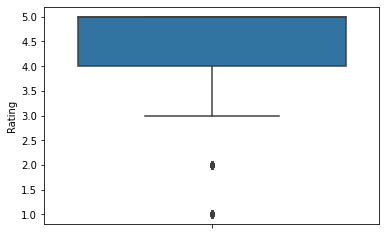

In [67]:
#check for outliers-

sns.boxplot(y="Rating",data=appreal)

Inference-

Need not to run outlier treatment as not much outliers.

<AxesSubplot:ylabel='Positive Feedback'>

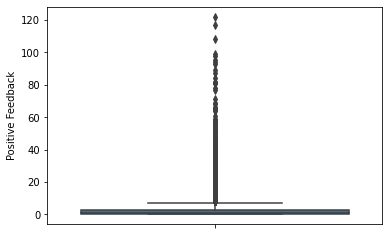

In [68]:
sns.boxplot(y="Positive Feedback",data=appreal)

Inference-

Outliers need to be treated.

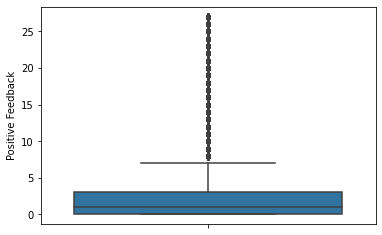

In [71]:
#outlier treatment-

Q3 = appreal["Positive Feedback"].quantile(0.99)
appreal = appreal[(appreal["Positive Feedback"] <= Q3)]
Q1 = appreal["Positive Feedback"].quantile(0.01)
appreal = appreal[(appreal["Positive Feedback"] >= Q1)]
sns.boxplot(y=appreal['Positive Feedback'])
plt.show()

In [18]:
#tolist(), used to convert the data elements of an array into a list-

appreal['Reviews'].tolist()

['Absolutely wonderful - silky and sexy and comfortable',
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments

In [19]:
## Expanding contractions-

contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not","he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have","i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have","needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have","so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your "," n ": " and ",
"I'm": "I am"}

In [20]:
# Function for expanding contractions-

def contraction_to_fullform(text):
    text = text.replace('\\', '')
    for key in contractions:
        value = contractions[key]
        text = text.replace(key, value)
    return text

In [21]:
# Expanding Contractions in the title, text-

appreal['Reviews'] = appreal['Reviews'].apply(lambda x: contraction_to_fullform(x))

In [22]:
appreal['Reviews'].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it is sooo pretty.  i happen...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it is fun, f...
4    This shirt is very flattering to all due to th...
Name: Reviews, dtype: object

In [24]:
# checking values in recommend column-

appreal["Recommend"].value_counts(normalize=True)

1    0.81874
0    0.18126
Name: Recommend, dtype: float64

In [25]:
#new column to store the values obtained after replacing number with a text-

appreal['Recommend_status']=appreal['Recommend'].replace({0:"Not Recommended",1:"Recommended"})

In [26]:
#checking the dataset-

appreal.head()

,Age,Reviews,Rating,Recommend,Positive Feedback,Division,Department,Class,Recommend_status
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Recommended
1,34,Love this dress! it is sooo pretty. i happen...,5,1,4,General,Dresses,Dresses,Recommended
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Not Recommended
3,50,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,Recommended
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Recommended


### 3) EDA And Sentiment Analysis :

In [27]:
### let's perform sentiment analysis using TextBlob which is a NLP library-

!pip install textblob

In [28]:
from textblob import TextBlob

In [29]:
TextBlob('Absolutely wonderful - silky and sexy and comfortable').sentiment.polarity

0.6333333333333333

In [30]:
appreal['polarity'] = appreal['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
appreal['ReviewLen'] = appreal['Reviews'].apply(lambda x: len(x))
appreal['WordCount'] = appreal['Reviews'].apply(lambda x: len(x.split()))

Inference-

The range of polarity is from -1 to 1(negative to positive) and will tell us if the text contains positive or negative feedback

In [31]:
appreal.head()

,Age,Reviews,Rating,Recommend,Positive Feedback,Division,Department,Class,Recommend_status,polarity,ReviewLen,WordCount
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Recommended,0.633333,53,8
1,34,Love this dress! it is sooo pretty. i happen...,5,1,4,General,Dresses,Dresses,Recommended,0.339583,306,65
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Not Recommended,0.073675,500,98
3,50,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,Recommended,0.550000,125,23
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Recommended,0.512891,192,36


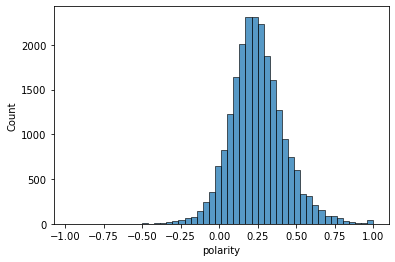

In [32]:
# Polarity Distribution-

ax=sns.histplot(x='polarity', data=appreal,bins=50)

plt.show()

Inference-

Polarity distribution is around 0.25 and maximum of them is positive.

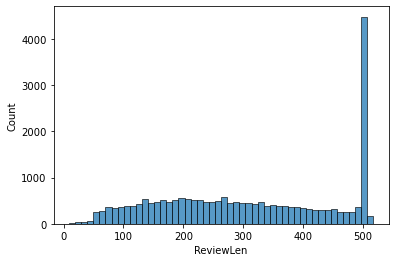

In [33]:
#the length of unstructured review column-

sns.histplot(x='ReviewLen', data=appreal,bins=50)

plt.show()

#### a) Wordcloud analysis of data-

In [34]:
!pip install wordcloud

In [35]:
from wordcloud import WordCloud , STOPWORDS

In [36]:
appreal['Reviews']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it is sooo pretty.  i happen...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it is fun, f...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Reviews, Length: 22625, dtype: object

In [37]:
#joining all the texts in review column-

total_comments=' '.join(appreal['Reviews'])

In [38]:
total_comments[0:100]

'Absolutely wonderful - silky and sexy and comfortable Love this dress!  it is sooo pretty.  i happen'

(-0.5, 399.5, 199.5, -0.5)

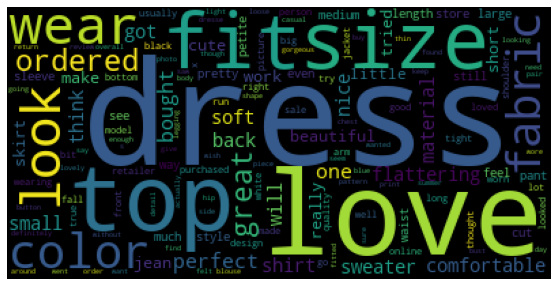

In [39]:
#wordcloud analysis-

wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Inference-

 The customer reviews on a women clothing e-commerce is mostly positive with customers emphazing more on dress and top they ordered is of fitsize and they loved it.

#### b) EDA-

In [40]:
#checking the dataset again-

appreal.head()

,Age,Reviews,Rating,Recommend,Positive Feedback,Division,Department,Class,Recommend_status,polarity,ReviewLen,WordCount
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Recommended,0.633333,53,8
1,34,Love this dress! it is sooo pretty. i happen...,5,1,4,General,Dresses,Dresses,Recommended,0.339583,306,65
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Not Recommended,0.073675,500,98
3,50,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,Recommended,0.550000,125,23
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Recommended,0.512891,192,36


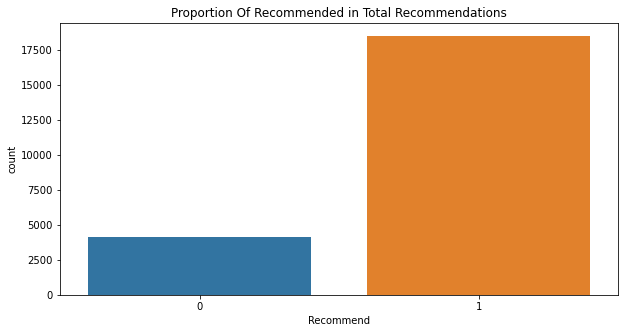

In [41]:
# plotting the recommend column-

plt.figure(figsize=(10,5))

plt.title('Proportion Of Recommended in Total Recommendations')
sns.countplot(x='Recommend',data=appreal)
plt.show()



Inference-

Maximum customers have recommended the products of this e-commerce(recommend=1).

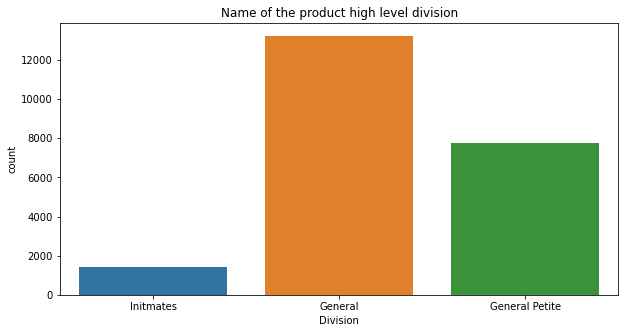

In [85]:
plt.figure(figsize=(10,5))

plt.title('Name of the product high level division')
sns.countplot(x='Division',data=appreal)
plt.show()


Inference-

General division is maximum in number.

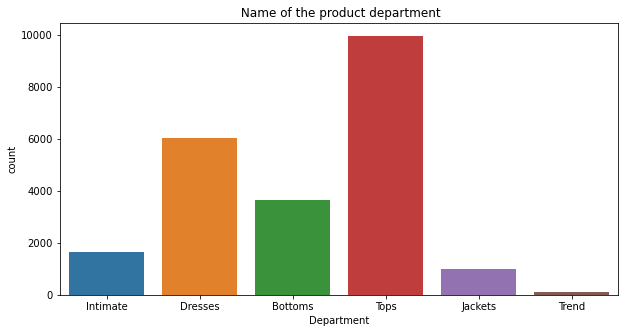

In [86]:
plt.figure(figsize=(10,5))

plt.title(' Name of the product department')
sns.countplot(x='Department',data=appreal)
plt.show()


Inference-

Tops department is more in number followed by dresses.

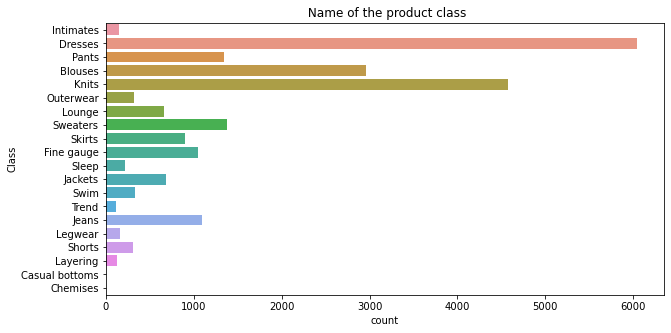

In [88]:
plt.figure(figsize=(10,5))

plt.title(' Name of the product class')
sns.countplot(y='Class',data=appreal)
plt.show()


Inference-

Dresses class is more in number followed by knits.

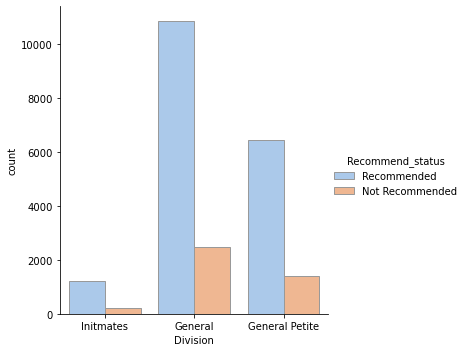

In [43]:
sns.catplot(x="Division", hue="Recommend_status", kind="count",
            palette="pastel", edgecolor=".6",
            data=appreal)

Inference-

 product high level division-
 
 1)General-most recommended by customers
 
 2)Initimates-least recommended


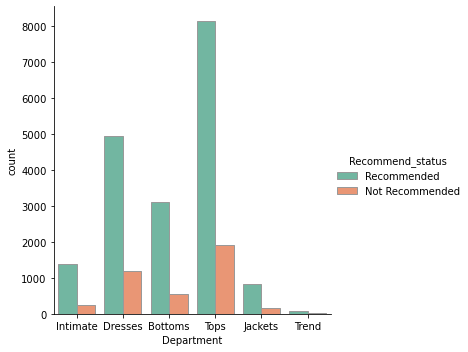

In [44]:
sns.catplot(x="Department", hue="Recommend_status", kind="count",
            palette="Set2", edgecolor=".6",
            data=appreal)

Inference-

Tops Department are the most recommended department followed by dresses.

<Figure size 1080x720 with 0 Axes>

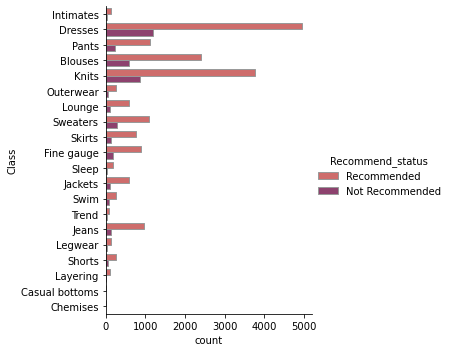

In [45]:
plt.figure(figsize=(15,10))
sns.catplot(y="Class", hue="Recommend_status", kind="count",
            palette="flare", edgecolor=".6",
            data=appreal)
plt.show()

Inference-

Class Dress is the most recommended class followed by knits.

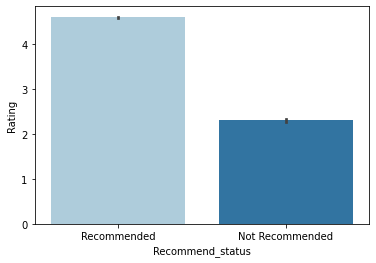

In [46]:
ax = sns.barplot(x="Recommend_status", y="Rating", data=appreal,palette="Paired")

plt.show()

Inference-

Recommended products are of high rating.

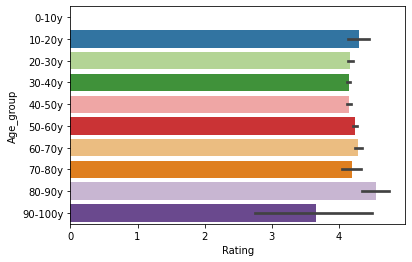

In [91]:
ax = sns.barplot(y="Age_group", x="Rating", data=appreal,palette="Paired")

plt.show()

Inference-

Age group 80-90 give max rating followed by 10-20 years.

Reason- 

As most of them are not working .So have a time to give rating.